In [ ]:
from google.colab import files
uploaded=files.upload()

Saving news.csv to news.csv


## Importing Libraries and Datasets

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/news.csv',index_col=0)
print(data)

                                                   title  \
8476                        You Can Smell Hillary’s Fear   
10294  Watch The Exact Moment Paul Ryan Committed Pol...   
3608         Kerry to go to Paris in gesture of sympathy   
10142  Bernie supporters on Twitter erupt in anger ag...   
875     The Battle of New York: Why This Primary Matters   
...                                                  ...   
4490   State Department says it can't find emails fro...   
8062   The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
8622   Anti-Trump Protesters Are Tools of the Oligarc...   
4021   In Ethiopia, Obama seeks progress on peace, se...   
4330   Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                    text label  
8476   Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
10294  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
3608   U.S. Secretary of State John F. Kerry said Mon...  REAL  
10142  — Kaydee Kin

In [ ]:
data.head()

,title,text,label
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6335 entries, 8476 to 4330
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 198.0+ KB


In [ ]:
data.describe()

,title,text,label
count,6335,6335,6335
unique,6256,6060,2
top,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,5,58,3171


## Data preprocessing

In [ ]:
data.shape

(6335, 3)

In [ ]:
# dropping only 'title'
data = data.drop(["title"], axis=1)


# Print the column names to verify their presence and spelling
print(data.columns)



Index(['text', 'label'], dtype='object')


In [ ]:
data.isnull().sum()

,0
text,0
label,0


In [ ]:
# Shuffling
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)

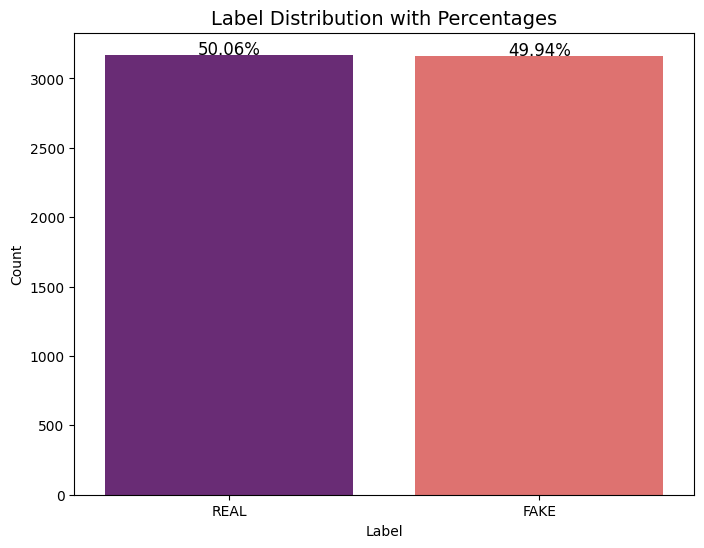

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count values
label_counts = data['label'].value_counts().reset_index()
label_counts.columns = ['label', 'count']
label_counts['percentage'] = (label_counts['count'] / label_counts['count'].sum()) * 100

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=label_counts, x='label', y='count', hue='label', palette='magma', legend=False)

# Annotate percentages
for i, row in label_counts.iterrows():
    plt.text(i, row['count'] + 5, f"{row['percentage']:.2f}%", ha='center', fontsize=12)

plt.title('Label Distribution with Percentages', fontsize=14)
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


## Preprocessing and analysis of News column

In [ ]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                  for token in str(sentence).split()
                                  if token not in stopwords.words('english')))

    return preprocessed_text

In [ ]:
preprocessed_review = preprocess_text(data['text'].values)
data['text'] = preprocessed_review

100%|██████████| 6335/6335 [07:24<00:00, 14.25it/s]


In [ ]:
print(data['label'].value_counts())


label
REAL    3171
FAKE    3164
Name: count, dtype: int64


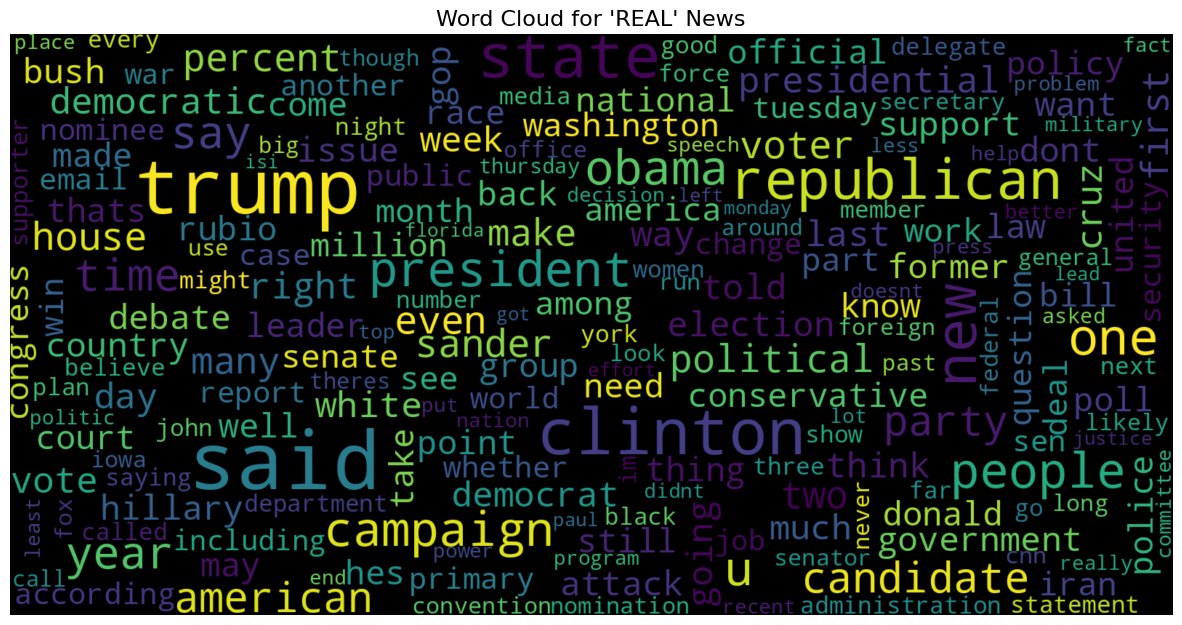

In [ ]:
# Real
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate for REAL
target_label = 'REAL'

# Join text for the given label
consolidated = ' '.join(data['text'][data['label'] == target_label].dropna().astype(str))

# Check and generate word cloud
if consolidated.strip():
    wordCloud = WordCloud(width=1600,
                          height=800,
                          random_state=21,
                          max_font_size=110,
                          collocations=False).generate(consolidated)

    plt.figure(figsize=(15, 10))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for '{target_label}' News", fontsize=16)
    plt.show()
else:
    print(f"No text found for label '{target_label}'.")



In [ ]:
print(data['label'].unique())  # Check unique values in the 'label' column


['FAKE' 'REAL']


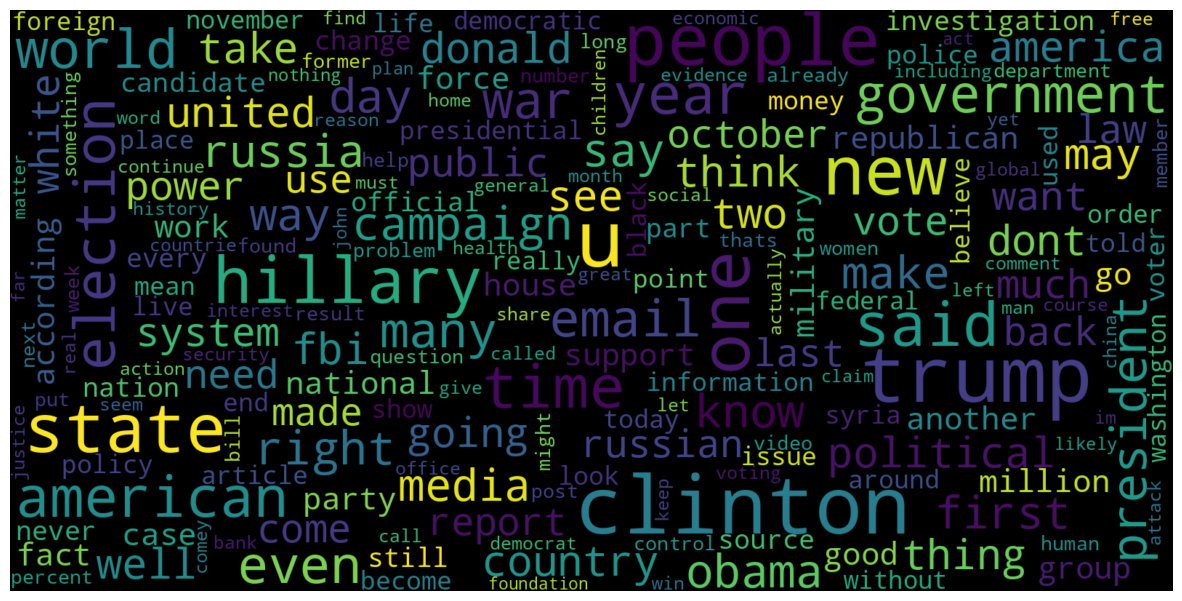

In [ ]:
# Fake

# Filter data for label 'FAKE'
consolidated = ' '.join(word for word in data['text'][data['label'] == 'FAKE'].astype(str))

# Check if there's any data for 'FAKE'
if consolidated:
    wordCloud = WordCloud(width=1600,
                          height=800,
                          random_state=21,
                          max_font_size=110,
                          collocations=False)
    plt.figure(figsize=(15, 10))
    plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("No data available for label 'FAKE'")


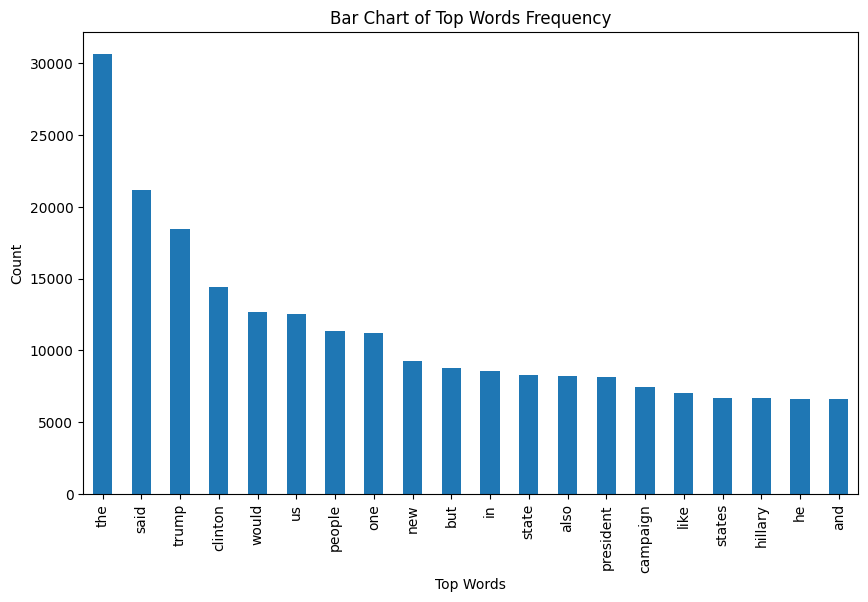

In [23]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(data['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Change 'data['class']' to 'data['label']' to use the correct target variable column
x_train, x_test, y_train, y_test = train_test_split(data['text'],
                                                    data['label'],  # Corrected column name
                                                    test_size=0.25)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9566407072195328
0.9147727272727273
